[link para GitHub](https://github.com/brenomferreira/Curso_Data_Science_analises_para_saude_e_medicina/blob/main/Principal.ipynb)



# Setup

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings_possibilidades = ["default", "error", "ignore", "always", "module", "once"]
warnings.filterwarnings(action=warnings_possibilidades[2])

In [168]:
url_confirmados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_mortes = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recuperados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

casos_confirmado = pd.read_csv(url_confirmados)
mortes = pd.read_csv(url_mortes)
recuperados = pd.read_csv(url_recuperados)

[link url_confirmados](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)

[link url_mortes](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

[link url_recuperados](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)


## ajustes e visualização dos dados

In [169]:
casos_confirmado.set_index("Country/Region", inplace=True)
mortes.set_index("Country/Region", inplace=True)
recuperados.set_index("Country/Region", inplace=True)

casos_confirmado_agrupados_por_paises = casos_confirmado.groupby("Country/Region").sum()
mortes_agrupados_por_paises = mortes.groupby("Country/Region").sum()
recuperados_agrupados_por_paises = recuperados.groupby("Country/Region").sum()


display(casos_confirmado.head(3))
display(mortes.head(3))
display(recuperados.head(3))

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496


,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881


,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Utilizando Filtro

>neste caso: Brasil

In [170]:
filtro = "Brazil"
casos_confirmados_filtrado = casos_confirmado_agrupados_por_paises.loc[filtro][
    3:
].to_frame()
casos_fatais_filtrado = mortes_agrupados_por_paises.loc[filtro][3:].to_frame()
recuperados_filtrado = recuperados_agrupados_por_paises.loc[filtro].to_frame()

## visualização

>Visualização em 3 eixos diferentes pois a grandeza difere muito para cada variável

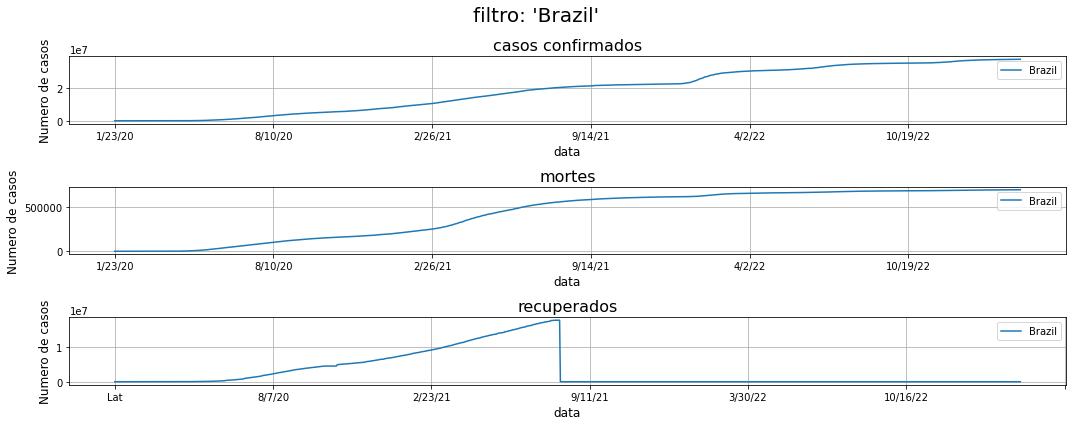

In [171]:
fig, ax = plt.subplots(3, figsize=(15, 6))
fig.suptitle(f"filtro: '{filtro}'", fontsize=20)
casos_confirmados_filtrado.plot(ax=ax[0])
ax[0].set_title("casos confirmados", fontsize=16)
ax[1].set_title("mortes", fontsize=16)
ax[2].set_title("recuperados", fontsize=16)


casos_fatais_filtrado.plot(ax=ax[1])
recuperados_filtrado.plot(ax=ax[2])
for axAtual in ax:
    axAtual.set_xlabel("data", fontsize=12)
    axAtual.set_ylabel("Numero de casos", fontsize=12)
    axAtual.grid(True)
fig.tight_layout()

>Por algum motivo, próximo a novembro/2021 pararam de reportar os numeros de recuperados

### Numero de casos por dia (no filtro)

In [172]:
mortes_por_dia = casos_fatais_filtrado.diff().dropna()
mortes_por_dia.columns = ["mortes por dia"]
print("descrição das mortes por dia:")
display(mortes_por_dia.describe().round(0))

descrição das mortes por dia:


,mortes por dia
count,1141.0
mean,613.0
std,721.0
min,-81.0
25%,99.0
50%,340.0
75%,912.0
max,4148.0


In [173]:
# mortes_por_dia.query(f"`mortes por dia` == {int(max(mortes_por_dia.values))} ").index


>Por algum motivo desconhecido, tem valores negativos para numero de mortes

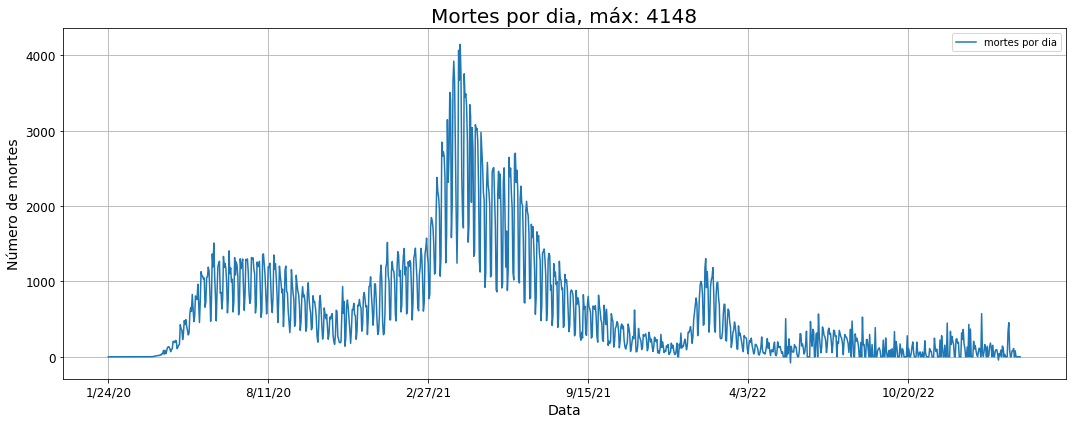

In [174]:
mortes_por_dia.index, mortes_por_dia.plot(figsize=(15, 6))
plt.title(f"Mortes por dia, máx: {int(max(mortes_por_dia.values))}", fontsize=20)
plt.ylabel("Número de mortes", fontsize=14)
plt.xlabel("Data", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(True)

# Total de casos

>Ultima coluna do DataFrame
>>Para Casos confirmados e Mortes (recuperados não teve atualizações recentes)

## Dados Mundiais

In [175]:
resumo_mortes = mortes_agrupados_por_paises.iloc[:, -1].to_frame()
resumo_casos_confirmados = casos_confirmado_agrupados_por_paises.iloc[:, -1].to_frame()
resumo = pd.concat([resumo_casos_confirmados, resumo_mortes], axis=1)
resumo.columns = ["Casos Confirmados", "Mortes"]
resumo.rename_axis("País", inplace=True)
resumo.rename_axis(columns="Resumo COVID", inplace=True)
resumo.sort_values("Casos Confirmados", ascending=False, inplace=True)
display(resumo.head(10))

Resumo COVID,Casos Confirmados,Mortes
País,,
US,103802702,1123836
India,44690738,530779
France,39866718,166176
Germany,38249060,168935
Brazil,37076053,699276
Japan,33320438,72997
"Korea, South",30615522,34093
Italy,25603510,188322
United Kingdom,24658705,220721


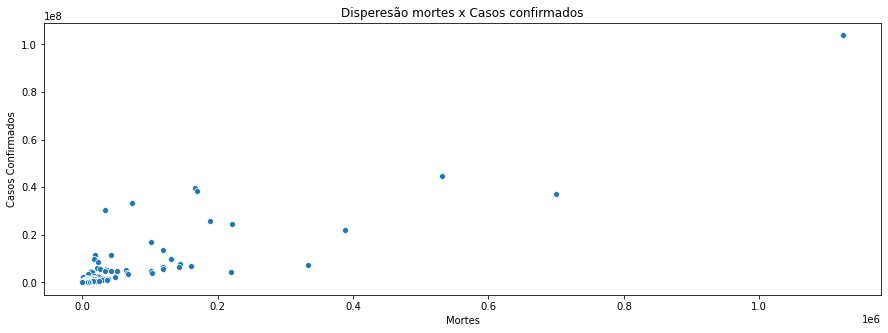

In [176]:
ax = sns.scatterplot(data=resumo, x="Mortes", y="Casos Confirmados")
ax.set_title("Disperesão mortes x Casos confirmados")
ax.figure.set_size_inches(15, 5)

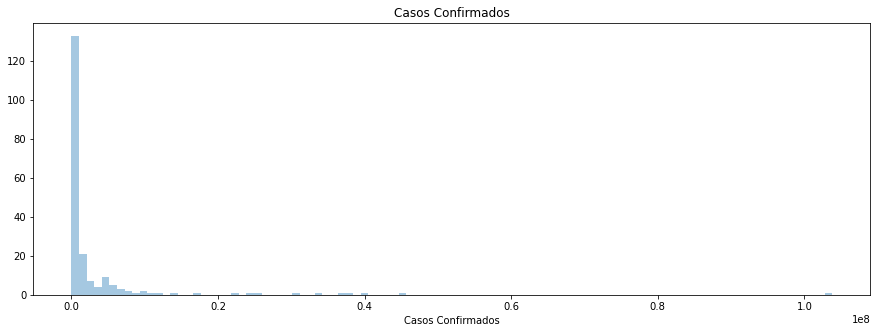

In [177]:
ax = sns.distplot(resumo["Casos Confirmados"], kde=False, bins=100)
ax.set_title("Casos Confirmados")
ax.figure.set_size_inches(15, 5)

## Dados do Brasil

In [178]:
resumo.loc[["Brazil"]]

Resumo COVID,Casos Confirmados,Mortes
País,,
Brazil,37076053,699276


## Casos confirmados, sem levar em consideração a relação com o tamanho da população

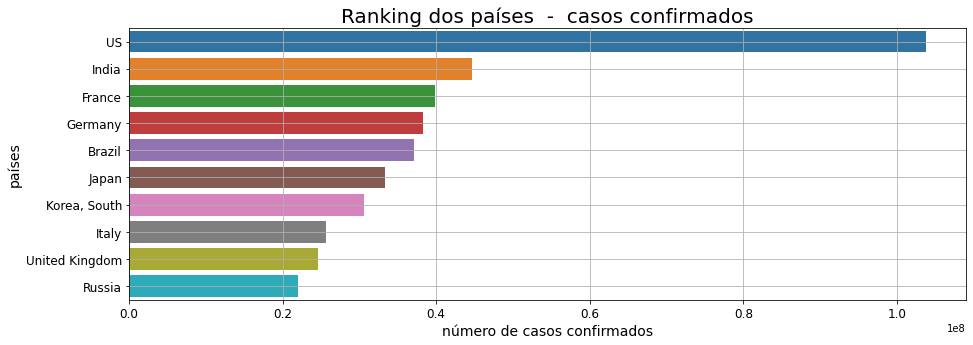

In [179]:
df = resumo["Casos Confirmados"].sort_values(ascending=False).iloc[0:10].to_frame()
ax = sns.barplot(data=df, x="Casos Confirmados", y=df.index)
ax.figure.set_size_inches(15, 5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_title("Ranking dos países  -  casos confirmados", fontsize=20)
ax.set_xlabel("número de casos confirmados", fontsize=14)
ax.set_ylabel("países", fontsize=14)
ax.grid(True)

## Casos fatais, sem levar em consideração a relação com o tamanho da população

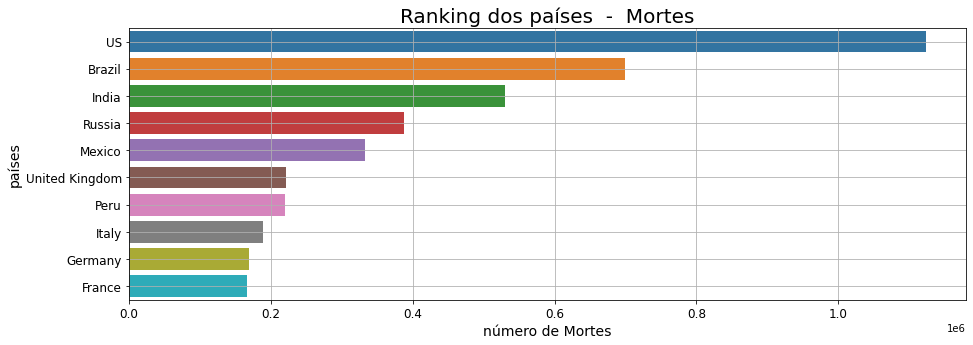

In [180]:
df = resumo["Mortes"].sort_values(ascending=False).iloc[0:10].to_frame()
ax = sns.barplot(data=df, x="Mortes", y=df.index)
ax.figure.set_size_inches(15, 5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_title("Ranking dos países  -  Mortes", fontsize=20)
ax.set_xlabel("número de Mortes", fontsize=14)
ax.set_ylabel("países", fontsize=14)
ax.grid(True)

## conclusão prévia:

A partir da dispersão entre motes e casos confirmados, levanta-se a hipotese de que: apesar da correlação entre os dados, não há uma universalidade no letalidade. Isso se confirma pelos rankings, por exemplo, o caso Brasil: em casos confirmados esta em quinto lugar, já em mortes está em segundo.

# Estimativa letalidade 

In [181]:
letalidade = resumo["Mortes"] / resumo["Casos Confirmados"] * 100
resumo["letalidade"] = letalidade
resumo

Resumo COVID,Casos Confirmados,Mortes,letalidade
País,,,
US,103802702,1123836,1.082665
India,44690738,530779,1.187671
France,39866718,166176,0.416829
Germany,38249060,168935,0.441671
Brazil,37076053,699276,1.886058
...,...,...,...
Winter Olympics 2022,535,0,0.000000
Holy See,29,0,0.000000
Antarctica,11,0,0.000000


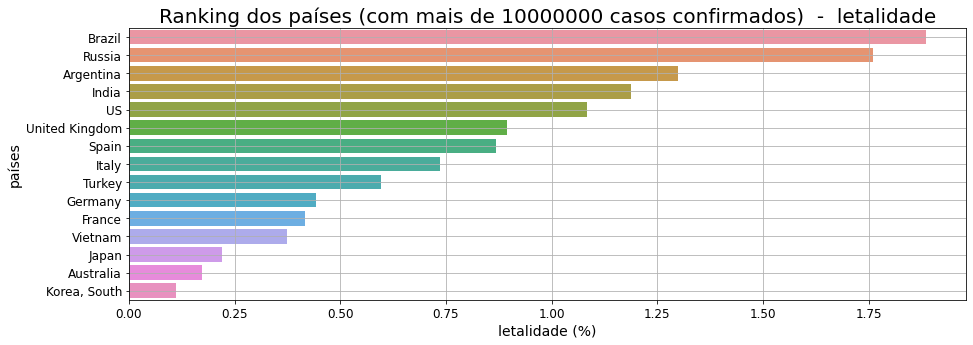

In [182]:
filtro = 10000000
df = (
    resumo.query(f"`Casos Confirmados` > {filtro}")["letalidade"]
    .sort_values(ascending=False)
    .to_frame()
)
ax = sns.barplot(data=df, x="letalidade", y=df.index)
ax.figure.set_size_inches(15, 5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_title(
    f"Ranking dos países (com mais de {filtro} casos confirmados)  -  letalidade",
    fontsize=20,
)
ax.set_xlabel("letalidade (%)", fontsize=14)
ax.set_ylabel("países", fontsize=14)
ax.grid(True)

# Conclusão:
Entre os países com maior contaminação, o Brasil - devido as medidas adotadas - fica em primeiro lugar quando se compara a letalidade da COVID

# Próximos passos
## como ficaria a distribuiçoes destes casos?
## E globalmente?

In [183]:
!jupyter nbconvert --to html --no-input Principal.ipynb
!jupyter nbconvert --to pdf --no-input Principal.ipynb

[NbConvertApp] Converting notebook Principal.ipynb to html
[NbConvertApp] Writing 844215 bytes to Principal.html
[NbConvertApp] Converting notebook Principal.ipynb to pdf
[NbConvertApp] Support files will be in Principal_files/
[NbConvertApp] Making directory ./Principal_files
[NbConvertApp] Making directory ./Principal_files
[NbConvertApp] Making directory ./Principal_files
[NbConvertApp] Making directory ./Principal_files
[NbConvertApp] Making directory ./Principal_files
[NbConvertApp] Making directory ./Principal_files
[NbConvertApp] Making directory ./Principal_files
[NbConvertApp] Writing 31069 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 206363 bytes to Principal.pdf
